In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import openpyxl 

# Load Data Functions
from load_data import load_house_price_and_earning_by_district
from load_data import load_council_tax_data
from load_data import load_homeless_demographic

In [2]:
median_house_price, lower_quatile_house_price, median_earning, lower_quatile_earning, median_quatile_ratio, lower_quatile_ratio = load_house_price_and_earning_by_district()

In [3]:
# houses_above_0k, band A-B
# houses_above_52k, band C-D
# houses_above_88k, band E-F
# houses_above_160k, band G-H
# council_tax_band, combined as one

houses_above_0k, houses_above_52k, houses_above_88k, houses_above_160k,council_tax_band = load_council_tax_data()

In [4]:
homeless_households_count_by_duties = load_homeless_demographic()

Record counts: 299
The IQR Maximum: 587.0
The Q3: 287.0
The Mean: 227.1571906354515
The Median: 158.0
The Q1: 87.0
The Actual Minimum: 0
Number of Outliers on the Right: 20


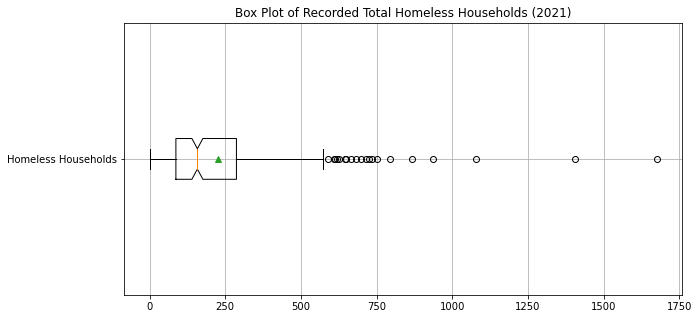

In [5]:
# Figure 1
no_record_LAs = homeless_households_count_by_duties.loc[homeless_households_count_by_duties.loc[:,'Total initial assessments1,2']<0].index
total_homeless_record = np.array(homeless_households_count_by_duties.drop(labels=no_record_LAs, axis=0).iloc[:,2])

fig_box, ax_box = plt.subplots(figsize=(10,5))
ax_box.grid(zorder=0)
ax_box.set_title('Box Plot of Recorded Total Homeless Households (2021)')
ax_box.boxplot(total_homeless_record,showmeans=True, vert=False,notch=True,zorder=2)
ax_box.set_yticklabels(['Homeless Households'])
plt.savefig('Figure/recorded_total_homeless_households_box.png')

Q3, Q1 = np.percentile(total_homeless_record, [75 ,25])
IQR = Q3-Q1
Q_max = Q3+1.5*IQR
Q_min = Q1-1.5*IQR
out_liers = len(total_homeless_record[total_homeless_record>Q_max])

print('Record counts: '+str(len(total_homeless_record)))
print('The IQR Maximum: '+str(Q_max))
print('The Q3: '+str(Q3))
print('The Mean: '+str(np.mean(total_homeless_record)))
print('The Median: '+str(np.median(total_homeless_record)))
print('The Q1: '+str(Q1))
print('The Actual Minimum: '+str(0))
print('Number of Outliers on the Right: '+str(out_liers))

Record counts: 314
(Median-House) The IQR Maximum: 558437.5
(Median-House) The Q3: 334375.0
(Median-House) The Mean: 282083.32484076434
(Median-House) The Median: 250000.0
(Median-House) The Q1: 185000.0
(Median-House) The Actual Minimum: 97500
(Median-House) Number of Outliers on the Right: 10

(LQ-House) The IQR Maximum: 558437.5
(LQ-House) The Q3: 334375.0
(LQ-House) The Mean: 282083.32484076434
(LQ-House) The Median: 250000.0
(LQ-House) The Q1: 185000.0
(LQ-House) The Actual Minimum: 97500
(LQ-House) Number of Outliers on the Right: 10


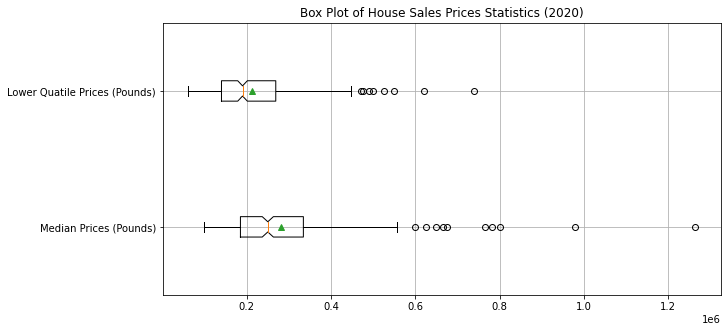

In [6]:
median_house_2020 = np.array(median_house_price.loc[:,2020])
lower_quatile_house_2020 = np.array(lower_quatile_house_price.loc[:,2020])

fig_box, ax_box = plt.subplots(figsize=(10,5))
ax_box.grid(zorder=0)
ax_box.set_title('Box Plot of House Sales Prices Statistics (2020)')
ax_box.boxplot([median_house_2020,lower_quatile_house_2020],showmeans=True, vert=False,notch=True,zorder=2)
ax_box.set_yticklabels(['Median Prices (Pounds)','Lower Quatile Prices (Pounds)'])
plt.savefig('Figure/house_sales_price_box_plot_2020.png')

MHQ3, MHQ1 = np.percentile(median_house_2020, [75 ,25])
MH_mean_value = np.mean(median_house_2020)
MHQ2 = np.median(median_house_2020)
MHIQR = MHQ3-MHQ1
MHQ_max = MHQ3+1.5*MHIQR
MHQ_min = MHQ1-1.5*MHIQR
MH_actual_min = min(median_house_2020)
MH_out_liers = len(median_house_2020[median_house_2020>MHQ_max])

LQQ3, LQQ1 = np.percentile(median_house_2020, [75 ,25])
LQ_mean_value = np.mean(median_house_2020)
LQQ2 = np.median(median_house_2020)
LQIQR = LQQ3-LQQ1
LQQ_max = LQQ3+1.5*LQIQR
LQQ_min = LQQ1-1.5*LQIQR
LQ_actual_min = min(median_house_2020)
LQ_out_liers = len(median_house_2020[median_house_2020>LQQ_max])

print('Record counts: '+str(len(median_house_2020)))
print('(Median-House) The IQR Maximum: '+str(MHQ_max))
print('(Median-House) The Q3: '+str(MHQ3))
print('(Median-House) The Mean: '+str(MH_mean_value))
print('(Median-House) The Median: '+str(MHQ2))
print('(Median-House) The Q1: '+str(MHQ1))
print('(Median-House) The Actual Minimum: '+str(MH_actual_min))
print('(Median-House) Number of Outliers on the Right: '+str(MH_out_liers))
print('')
print('(LQ-House) The IQR Maximum: '+str(LQQ_max))
print('(LQ-House) The Q3: '+str(LQQ3))
print('(LQ-House) The Mean: '+str(LQ_mean_value))
print('(LQ-House) The Median: '+str(LQQ2))
print('(LQ-House) The Q1: '+str(LQQ1))
print('(LQ-House) The Actual Minimum: '+str(LQ_actual_min))
print('(LQ-House) Number of Outliers on the Right: '+str(LQ_out_liers))

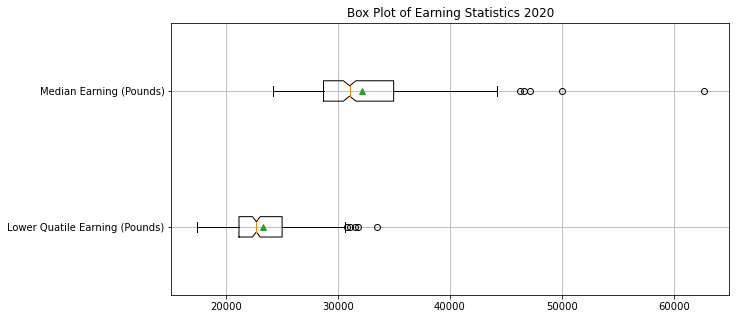

In [7]:
lq_earning_2020 = np.array(lower_quatile_earning.loc[:,2020])
mq_earning_2020 = np.array(median_earning.loc[:,2020])

fig_box, ax_box = plt.subplots(figsize=(10,5))
ax_box.grid(zorder=0)
ax_box.set_title('Box Plot of Earning Statistics 2020')
ax_box.boxplot([lq_earning_2020,mq_earning_2020],showmeans=True, vert=False,notch=True,zorder=2)
ax_box.set_yticklabels(['Lower Quatile Earning (Pounds)','Median Earning (Pounds)'])
plt.savefig('Figure/earning_box_plot_2020.png')

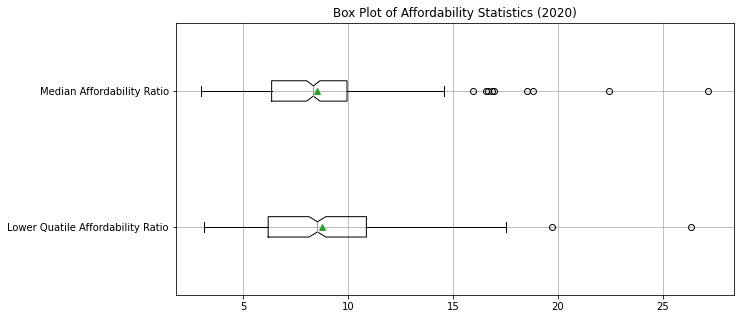

In [8]:
lq_ratio_2020 = np.array(lower_quatile_ratio.loc[:,2020])
mq_ratio_2020 = np.array(median_quatile_ratio.loc[:,2020])

fig_box, ax_box = plt.subplots(figsize=(10,5))
ax_box.grid(zorder=0)
ax_box.set_title('Box Plot of Affordability Statistics (2020)')
ax_box.boxplot([lq_ratio_2020,mq_ratio_2020],showmeans=True, vert=False,notch=True,zorder=2)
ax_box.set_yticklabels(['Lower Quatile Affordability Ratio','Median Affordability Ratio'])
plt.savefig('Figure/affordability_ratio_box_plot_2020.png')

In [9]:
houses_in_bands = [houses_above_0k['property_counts'],
                   houses_above_52k['property_counts'], houses_above_88k['property_counts'], houses_above_160k['property_counts']]

In [10]:
max(houses_in_bands[0])

291750

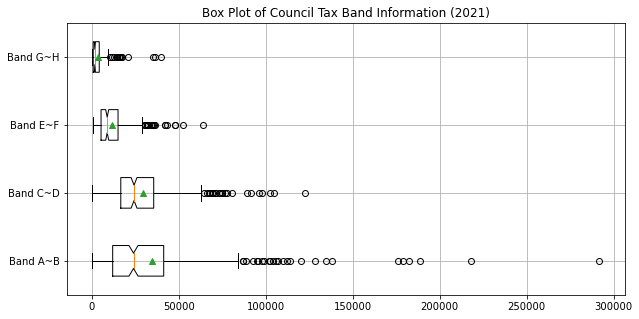

In [11]:
fig_box, ax_box = plt.subplots(figsize=(10,5))
ax_box.grid(zorder=0)
ax_box.set_title('Box Plot of Council Tax Band Information (2021)')
ax_box.boxplot(houses_in_bands,showmeans=True, vert=False,notch=True,zorder=2)
ax_box.set_yticklabels(['Band A~B','Band C~D','Band E~F','Band G~H'])
plt.savefig('Figure/council_tax_band_data_2021.png')